<a href="https://colab.research.google.com/github/NRJaggers/Applied-Stochastic-Processes/blob/main/PracticeProblems/DTMC_Long_Run_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Discrete Time Markov Chains: Long Run Behavior

---

## Prompt

Original Prompt can be found [here](https://bookdown.org/kevin_davisross/applied-stochastic-processes/pp-mc-longrun.html). A copy of the prompt  can be found on github under [/PracticeProblems/Prompts](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems/Prompts) along with completed exercises under [/PracticeProblems](https://github.com/NRJaggers/Applied-Stochastic-Processes/tree/main/PracticeProblems).

---

## Problems

###1.

###2.

###3.

a.

$$
\mathbf{P} =
\begin{bmatrix}
& 0 & 1 & 2 & 3 & 4\\
0 & 0 & 0 & 0 & 0 & 1\\
1 & 0 & 0.2 & 0 & 0.8 & 0\\
2 & 0.1 & 0.2 & 0.3 & 0.4 & 0\\
3 & 0 & 0.6 & 0 & 0.4 & 0\\
4 & 0.3 & 0 & 0 & 0 & 0.7
\end{bmatrix}
$$

In [1]:
pip install mchmm

In [12]:
import mchmm as mc
import numpy as np

In [20]:
states = ["0", "1", "2", "3", "4"]

transition = np.array([
    [0, 0, 0, 0, 1],
    [0, 0.2, 0, 0.8, 0],
    [0.1, 0.2, 0.3, 0.4, 0],
    [0, 0.6, 0, 0.4, 0],
    [0.3, 0, 0, 0, 0.7]
])

a = mc.MarkovChain(states, None, transition)

In [21]:
a.observed_p_matrix

array([[0. , 0. , 0. , 0. , 1. ],
       [0. , 0.2, 0. , 0.8, 0. ],
       [0.1, 0.2, 0.3, 0.4, 0. ],
       [0. , 0.6, 0. , 0.4, 0. ],
       [0.3, 0. , 0. , 0. , 0.7]])

In [23]:
graph = a.graph_make(
      format="png",
      graph_attr=[("rankdir", "LR")],
      node_attr=[("fontname", "Roboto bold"), ("fontsize", "20")],
      edge_attr=[("fontname", "Iosevka"), ("fontsize", "12")]
    )

In [24]:
graph.render()

'Digraph.gv.png'

In [25]:
import os
import matplotlib.pyplot as plt

In [26]:
img = plt.imread('Digraph.gv.png')

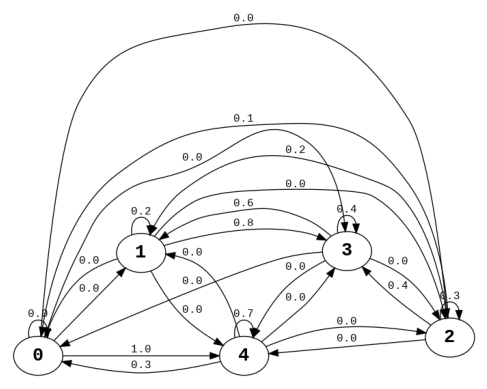

In [27]:
plt.axis("off")
plt.imshow(img)

b.

$$
\mathbf{P} =
\begin{bmatrix}
& 0 & 1 & 2 & 3 & 4 & 5\\
0 & 2/3 & 0 & 0 & 1/3 & 0 & 0\\
1 & 0 & 1/2 & 0 & 0 & 1/2 & 0\\
2 & 0 & 0 & 1/3 & 1/3 & 1/3 & 0\\
3 & 1/2 & 0 & 0 & 1/2 & 0 & 0\\
4 & 0 & 1/2 & 0 & 0 & 1/2 & 0\\
5 & 1/2 & 0 & 0 & 1/2 & 0 & 0
\end{bmatrix}
$$

---

## Reflection

With each Practice Problem submission, you should also take a few minutes to reflect on the practice problems and related material and thoughtfully respond to the following.

1. Write a sentence or two summarizing - in your own words - one big idea from this material.
2. Describe one particular aspect of this material that you found challenging and why. Then describe how you dealt with the challenge, or what you can do to deal with the challenge.
3. Write at least one specific question you have about this material. I strongly encourage you to post your questions directly in Discord as that's where I'll respond to questions. That is, if you really want an answer to your question - which I hope you do! - please post the question directly in Discord.